In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("500richest.csv", sep=';')# Start writing code here...

In [3]:
df.head()

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology,NaN,NaN,NaN,NaN
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology,NaN,NaN,NaN,NaN
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer,NaN,NaN,NaN,NaN
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology,NaN,NaN,NaN,NaN
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology,NaN,NaN,NaN,NaN


In [4]:
print(df.columns)

Index(['Rank', 'Name', 'Total Net Worth', '$ Last Change', '$ YTD Change',
       'Country', 'Industry', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10'],
      dtype='object')


In [5]:
df[['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10']].head()

,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [6]:
len(df)

503

In [7]:
unnamed_columns = ['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10']

for column in unnamed_columns:
    print(f"Number of miissing value ",df[[column]].isna().sum())

Number of miissing value  Unnamed: 7    503
dtype: int64
Number of miissing value  Unnamed: 8    503
dtype: int64
Number of miissing value  Unnamed: 9    503
dtype: int64
Number of miissing value  Unnamed: 10    503
dtype: int64


In [8]:
for column in unnamed_columns:
    del df[column]
df.head()

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology


In [9]:
from collections import Counter
print(Counter(df['Industry']))

Counter({'Technology': 83, 'Industrial': 56, 'Diversified': 45, 'Consumer': 42, 'Finance': 41, 'Real-Estate': 39, 'Food & Beverage': 35, 'Retail': 32, 'Health Care': 30, 'Energy': 27, 'Media & Telecom': 25, 'Commodities': 18, 'Services': 14, 'Entertainment': 12, nan: 4})


In [10]:
print(Counter(df['Industry']).most_common(5))

[('Technology', 83), ('Industrial', 56), ('Diversified', 45), ('Consumer', 42), ('Finance', 41)]


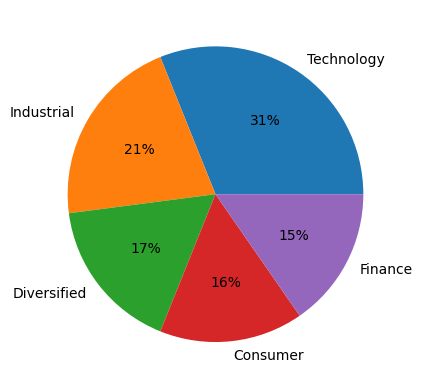

In [11]:
import matplotlib.pyplot as plt
keys = ['Technology', 'Industrial', 'Diversified', 'Consumer', 'Finance']
data = [83, 56, 45, 42, 41]
plt.pie(data, labels = keys, autopct='%.0f%%')
plt.show()

In [12]:
from collections import Counter
print(Counter(df['Country']).most_common(5))

[('United States', 157), ('China', 77), ('Germany', 31), ('Russia', 25), ('Hong Kong', 18)]


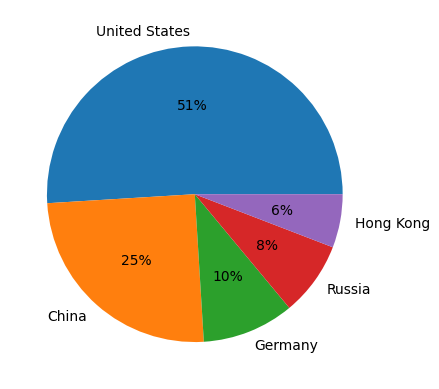

In [13]:
keys = ['United States', 'China', 'Germany', 'Russia', 'Hong Kong']
data = [157, 77, 31, 25, 18]
plt.pie(data, labels = keys, autopct='%.0f%%')
plt.show()

In [14]:
def industry_pie_chart(df_in, categorical_column, categorical_value):
        df_category = df_in[df_in[categorical_column] == categorical_value].copy()
        industry_dict = dict(Counter(df_category['Industry']).most_common(5))

        keys = list(industry_dict.keys())
        data = list(industry_dict.values())

        plt.pie(data, labels = keys, autopct='%.0f%%')
        plt.title(f"Industry Pie Chart for {categorical_value}")
        plt.show()

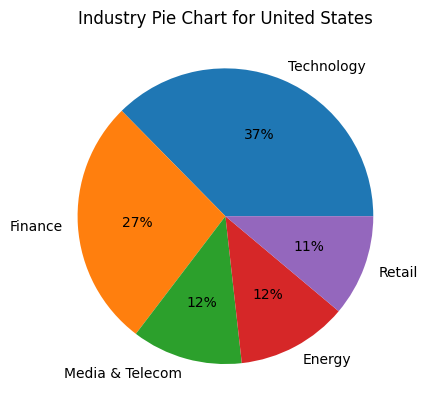

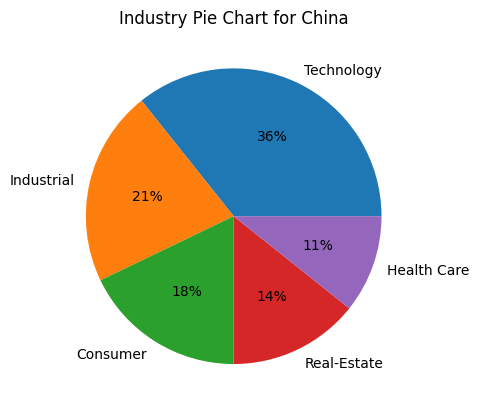

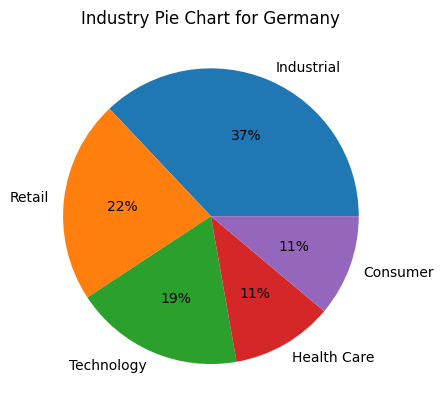

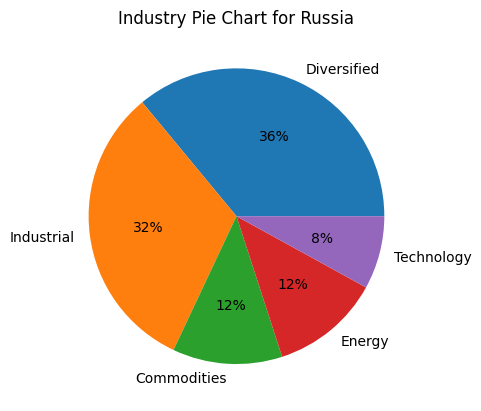

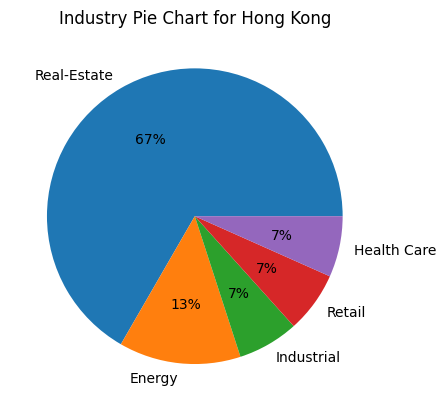

In [15]:
countries = ['United States', 'China', 'Germany', 'Russia', 'Hong Kong']
for country in countries:
    industry_pie_chart(df, 'Country', country)

In [16]:
import seaborn as sns 

def get_category_box_plot(df_in, categorical_column, numerical_column):
    most_common = dict(Counter(df_in[categorical_column]).most_common(5)).keys()
    most_common = list(most_common)
    df_category = df_in[df_in[categorical_column].isin(most_common)].copy()
    sns.set()
    sns.boxplot(x= df_category[categorical_column], y = df_category[numerical_column])
    plt.show()

In [17]:
df['Total Net Worth'] = df['Total Net Worth'].str.rstrip('B')
df['Total Net Worth'] = df['Total Net Worth'].str.lstrip('$')
df['Total Net Worth'] = pd.to_numeric(df['Total Net Worth'], errors='coerce')
df['Total Net Worth'].fillna(0, inplace=True)
df['Total Net Worth'].head()

0    188.0
1    170.0
2    155.0
3    144.0
4    114.0
Name: Total Net Worth, dtype: float64

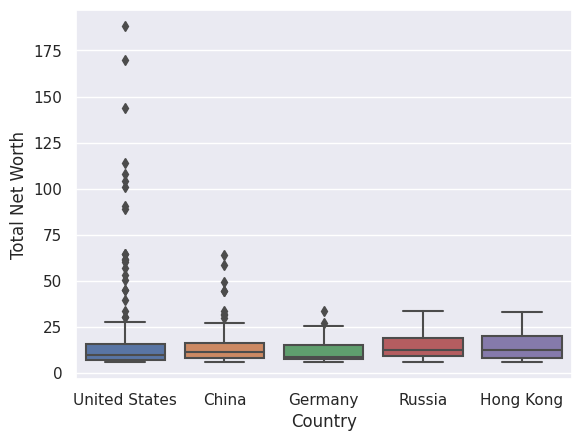

In [18]:
get_category_box_plot(df, 'Country', 'Total Net Worth')

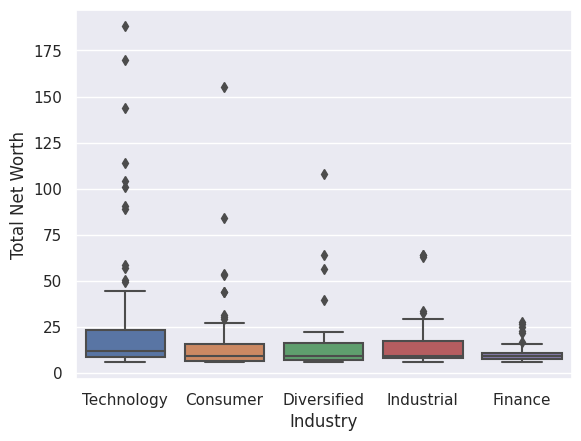

In [19]:
get_category_box_plot(df, 'Industry', 'Total Net Worth')

In [ ]:
def get_categorical_histogram(df_in, categorical_column, numerical_column):
    most_common = dict(Counter(df_in[categorical_column]).most_common(5)).keys()
    most_common = list(most_common)
    df_category = df_in[df_in[categorical_column].isin(most_common)].copy()    
    sns.histplot(data=df_category, hue= df_category[categorical_column], x = df_category[numerical_column], kde=True)

    sns.set()

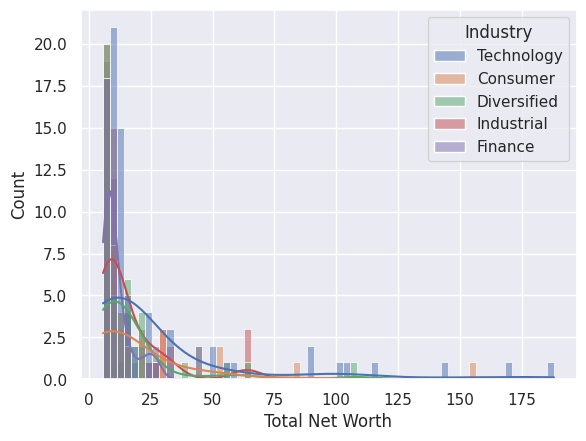

In [27]:
get_categorical_histogram(df, 'Industry', 'Total Net Worth')

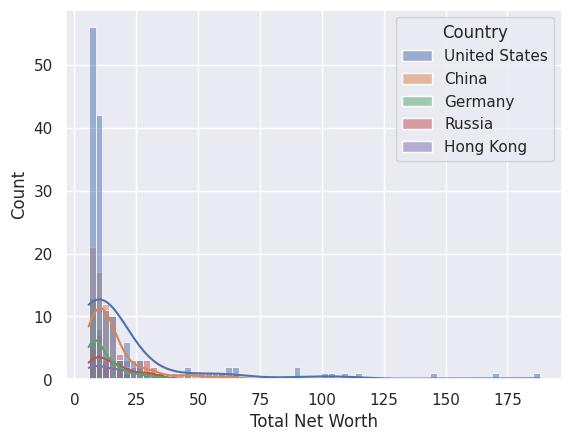

In [28]:
get_categorical_histogram(df, 'Country', 'Total Net Worth')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2c577ffb-67b7-4264-8e0e-20dc0d5e3b25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>